# Import Library

In [1]:
#semeone suggest to initiate the run with these codes to avoid unkown error with ConV
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [19]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [20]:
#define a function to show train histry in plots
import matplotlib.pyplot as plt
def show_train_history(train, test, KPI):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History of '+ KPI)
    if KPI== 'acc':
        plt.ylabel('Accuracy')
   
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

In [21]:
#選用categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 34s 844us/step - loss: 1.8119 - acc: 0.3435 - val_loss: 1.6121 - val_acc: 0.4558
Epoch 2/10
40000/40000 [==============================] - 30s 757us/step - loss: 1.4478 - acc: 0.4795 - val_loss: 1.3864 - val_acc: 0.5394
Epoch 3/10
40000/40000 [==============================] - 30s 758us/step - loss: 1.2971 - acc: 0.5383 - val_loss: 1.3103 - val_acc: 0.5811
Epoch 4/10
40000/40000 [==============================] - 30s 756us/step - loss: 1.1913 - acc: 0.5793 - val_loss: 1.2221 - val_acc: 0.6119
Epoch 5/10
40000/40000 [==============================] - 30s 753us/step - loss: 1.1056 - acc: 0.6077 - val_loss: 1.1540 - val_acc: 0.6330
Epoch 6/10
40000/40000 [==============================] - 30s 745us/step - loss: 1.0385 - acc: 0.6338 - val_loss: 1.1061 - val_acc: 0.6323
Epoch 7/10
40000/40000 [==============================] - 30s 747us/

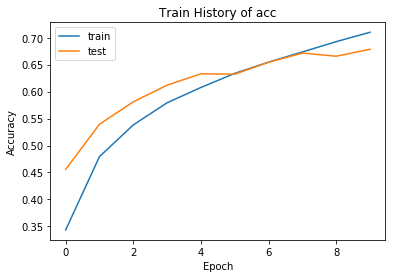

In [23]:
show_train_history('acc','val_acc','acc')

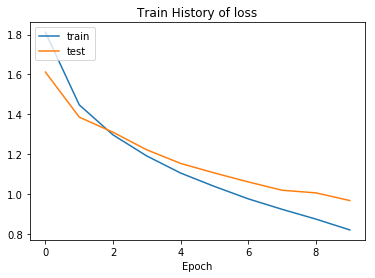

In [24]:
show_train_history('loss','val_loss','loss')

In [25]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 120us/step

accuracy= 0.6721


In [26]:
#選用MSE
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])

In [27]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 30s 738us/step - loss: 0.0353 - acc: 0.7463 - val_loss: 0.0421 - val_acc: 0.7085
Epoch 2/10
40000/40000 [==============================] - 29s 722us/step - loss: 0.0346 - acc: 0.7522 - val_loss: 0.0419 - val_acc: 0.7091
Epoch 3/10
40000/40000 [==============================] - 29s 721us/step - loss: 0.0342 - acc: 0.7552 - val_loss: 0.0415 - val_acc: 0.7104
Epoch 4/10
40000/40000 [==============================] - 29s 722us/step - loss: 0.0337 - acc: 0.7611 - val_loss: 0.0412 - val_acc: 0.7120
Epoch 5/10
40000/40000 [==============================] - 29s 726us/step - loss: 0.0335 - acc: 0.7614 - val_loss: 0.0409 - val_acc: 0.7149
Epoch 6/10
40000/40000 [==============================] - 29s 730us/step - loss: 0.0330 - acc: 0.7646 - val_loss: 0.0409 - val_acc: 0.7135
Epoch 7/10
40000/40000 [==============================] - 30s 741us/step - loss: 0.0328 - acc: 0.7643 - val_loss: 0.

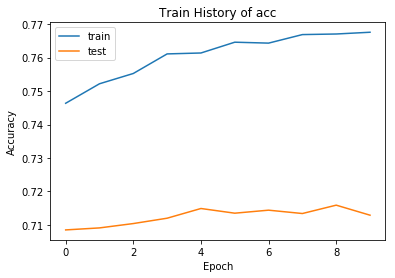

In [28]:
show_train_history('acc','val_acc','acc')

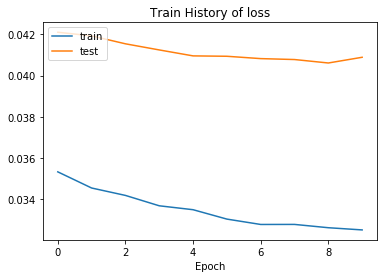

In [29]:
show_train_history('loss','val_loss','loss')

In [30]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 122us/step

accuracy= 0.7103


In [31]:
#選用binary _crossentropy
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
#run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 32s 789us/step - loss: 0.1116 - acc: 0.9565 - val_loss: 0.1392 - val_acc: 0.9466
Epoch 2/10
40000/40000 [==============================] - 31s 772us/step - loss: 0.1112 - acc: 0.9565 - val_loss: 0.1381 - val_acc: 0.9473
Epoch 3/10
40000/40000 [==============================] - 31s 773us/step - loss: 0.1092 - acc: 0.9575 - val_loss: 0.1395 - val_acc: 0.9465
Epoch 4/10
40000/40000 [==============================] - 31s 777us/step - loss: 0.1079 - acc: 0.9576 - val_loss: 0.1371 - val_acc: 0.9474
Epoch 5/10
40000/40000 [==============================] - 31s 771us/step - loss: 0.1065 - acc: 0.9584 - val_loss: 0.1360 - val_acc: 0.9477
Epoch 6/10
40000/40000 [==============================] - 31s 774us/step - loss: 0.1050 - acc: 0.9592 - val_loss: 0.1358 - val_acc: 0.9478
Epoch 7/10
40000/40000 [==============================] - 31s 771us/step - loss: 0.1035 - acc: 0.9599 - val_loss: 0.

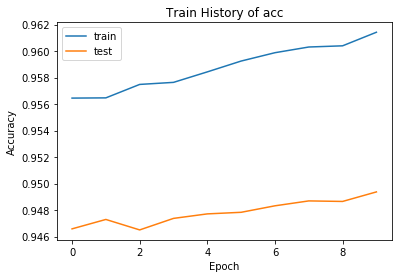

In [33]:
show_train_history('acc','val_acc','acc')

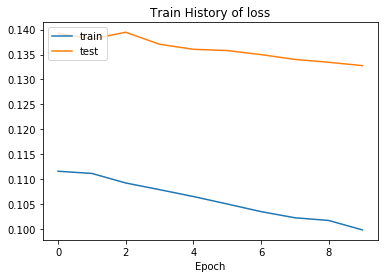

In [34]:
show_train_history('loss','val_loss','loss')

In [35]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 120us/step

accuracy= 0.9481399941444397
